# AI ODYSSSEY: CNN ASSIGNMENT

## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### FILTERS

Filters are the most unique part of a CNN. They make the bulk of the convolutional layers of a CNN, and thus differentiate it from a normal neural network.

**Describe the following filters:**
- averaging filter:
- gaussian filter:
- median filter:
- unsharp masking:
- prewitt filter:
- sobel filter:
- laplacian filter:

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Now give an example of application of each of these filters. You are required to load an image of your choice. Then, apply these filters to those images and display the image before and after convolution.**


**Averaging Filter**

In [ ]:
#ENTER YOUR CODE HERE
import cv2
import numpy as np
import matplotlib.pyplot as plt

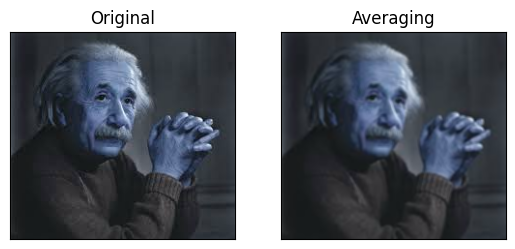

In [53]:
image_path = '/content/drive/MyDrive/images.jpeg'
image = cv2.imread(image_path)
kernel_size = (3,3)
blurred_image = cv2.blur(image, kernel_size)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_image),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


**Gaussian Filter**

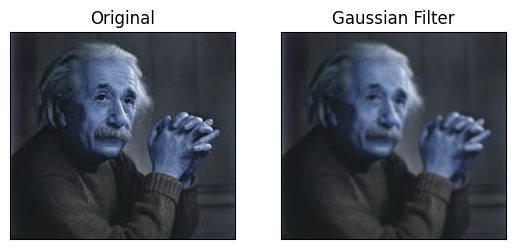

In [54]:
#ENTER YOUR CODE HERE
gaussian_filter = cv2.GaussianBlur(image, (5,5), 0)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_filter),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


**Median Filter**

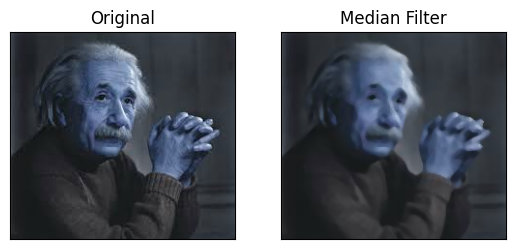

In [55]:
#ENTER YOUR CODE HERE
median_filter = cv2.medianBlur(image, 5)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median_filter),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

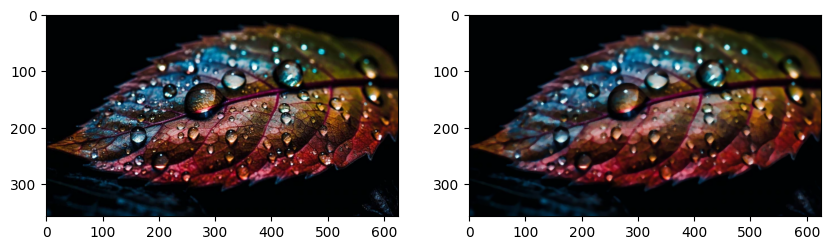

The nice images were for fun.

**Blurring is actually used for noise removal. Demonstrate.**

In [56]:
#ENTER YOUR CODE HERE
image_path = '/content/drive/MyDrive/Noise.png'
image = cv2.imread(image_path)


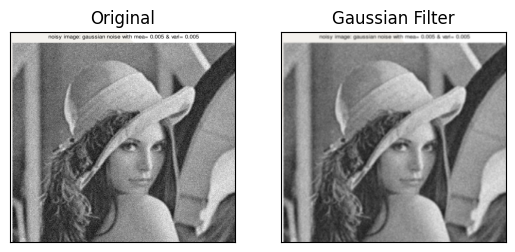

In [57]:
gaussian_filter = cv2.GaussianBlur(image, (9,9), 0)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_filter),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

**Unsharp Masking**

In [58]:
#ENTER YOUR CODE HERE
image_path = '/content/drive/MyDrive/Unsharp.png'
image = cv2.imread(image_path)


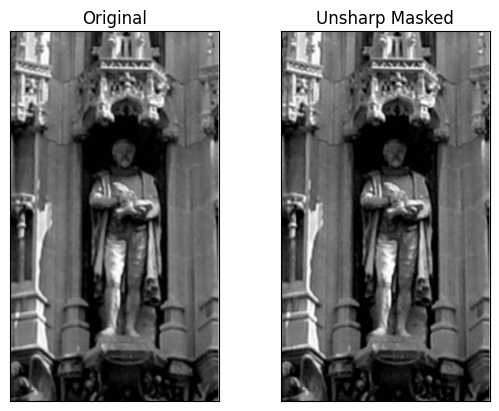

In [59]:
blurred_image = cv2.GaussianBlur(image, (9, 9), 0)
unsharp_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(unsharp_image),plt.title('Unsharp Masked')
plt.xticks([]), plt.yticks([])
plt.show()

**Prewitt Horizontal Filter**

In [82]:
#ENTER YOUR CODE HERE
image_path = '/content/drive/MyDrive/prewitt_hor.png'
image = cv2.imread(image_path)

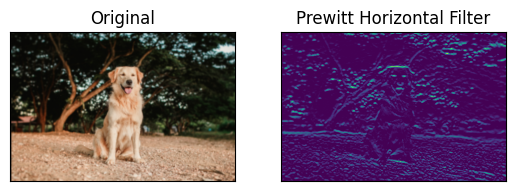

In [83]:
prewitt_horizontal_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
prewitt_horizontal = cv2.filter2D(gray_image,-1, prewitt_horizontal_kernel)

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(prewitt_horizontal),plt.title('Prewitt Horizontal Filter')
plt.xticks([]), plt.yticks([])
plt.show()

**Prewitt Vertical Filter**

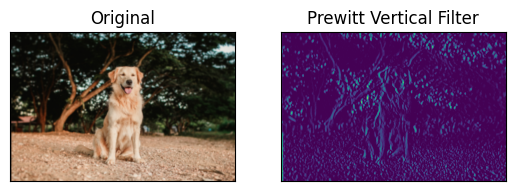

In [84]:
#ENTER YOUR CODE HERE
prewitt_vertical_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_vertical = cv2.filter2D(gray_image,-1, prewitt_vertical_kernel)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(prewitt_vertical),plt.title('Prewitt Vertical Filter')
plt.xticks([]), plt.yticks([])
plt.show()

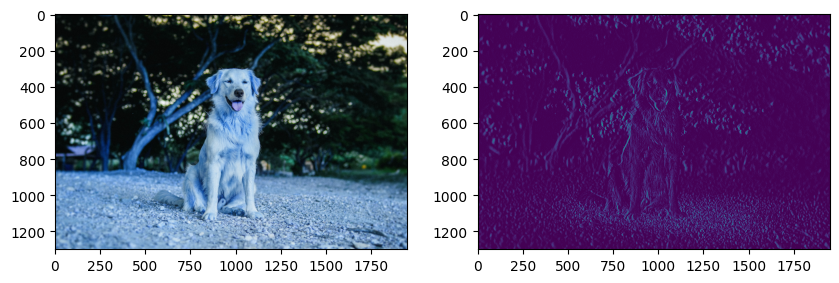

**Combined Prewitt**

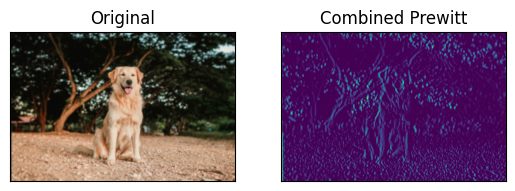

In [85]:
#ENTER YOUR CODE HERE
combined_prewitt = np.sqrt(prewitt_horizontal**2 + prewitt_vertical**2)
combined_prewitt = np.uint8(combined_prewitt)

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(prewitt_vertical),plt.title('Combined Prewitt')
plt.xticks([]), plt.yticks([])
plt.show()

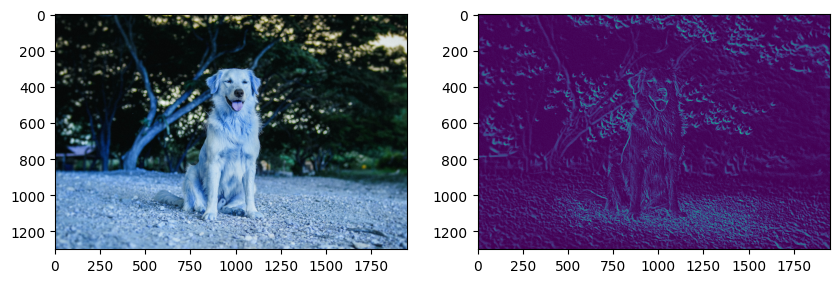

**Sobel Filter**

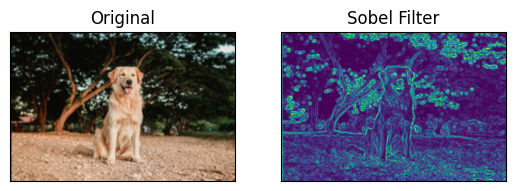

In [86]:
#ENTER YOUR CODE HERE
sobel_horizontal = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_vertical = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_horizontal**2 + sobel_vertical**2)
sobel_combined = np.uint8(sobel_combined)

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel_combined),plt.title('Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()


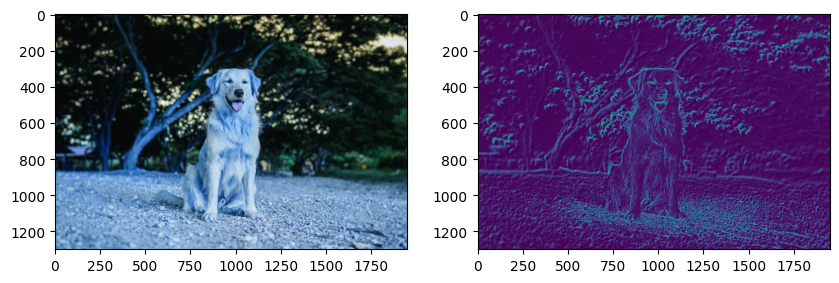

As you can see, the quality of sobel filter is better than that of combined prewitt.

**Laplacian Filter**

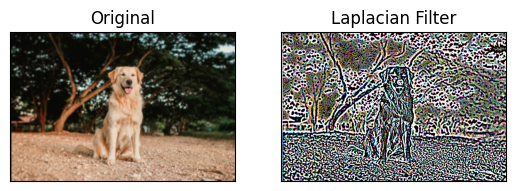

In [89]:
#ENTER YOUR CODE HERE
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F, (3,3))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


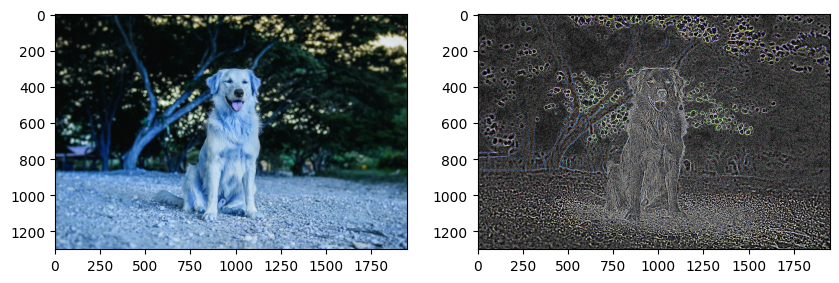

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [115]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

**What is the no. of elements in the training and testing datasets?**

In [116]:
#ENTER YOUR CODE HERE
print(f"No. of elements in training dataset: {X_train.shape[0]}")
print(f"No. of elements in testing dataset: {X_test.shape[0]}")


No. of elements in training dataset: 60000
No. of elements in testing dataset: 10000


No. of elements in training dataset: 60000
No. of elements in testing dataset: 10000


**What are the labels in the dataset?**

In [117]:
#ENTER YOUR CODE HERE
unique_labels = np.array(set(y_train))
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Visualise one image for each label.**

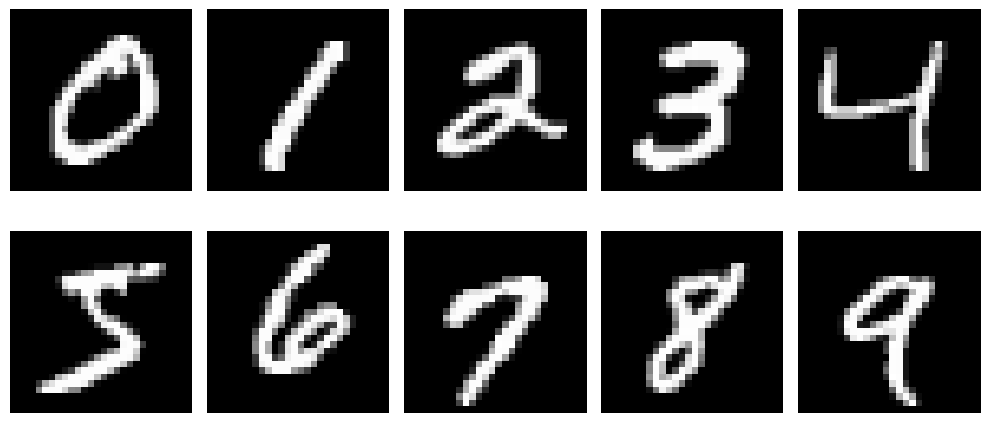

In [118]:
#ENTER YOUR CODE HERE
def find_images_for_labels(images, labels):
    label_dict = {}
    for image, label in zip(images, labels):
        if label not in label_dict:
            label_dict[label] = image
        if len(label_dict) == 10:  # Once we have one image for each label, we can stop
            break
    return label_dict

# Get one image for each label
label_images = find_images_for_labels(X_train, y_train)

# Display the images
def display_label_images(label_images):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(label_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_label_images(label_images)

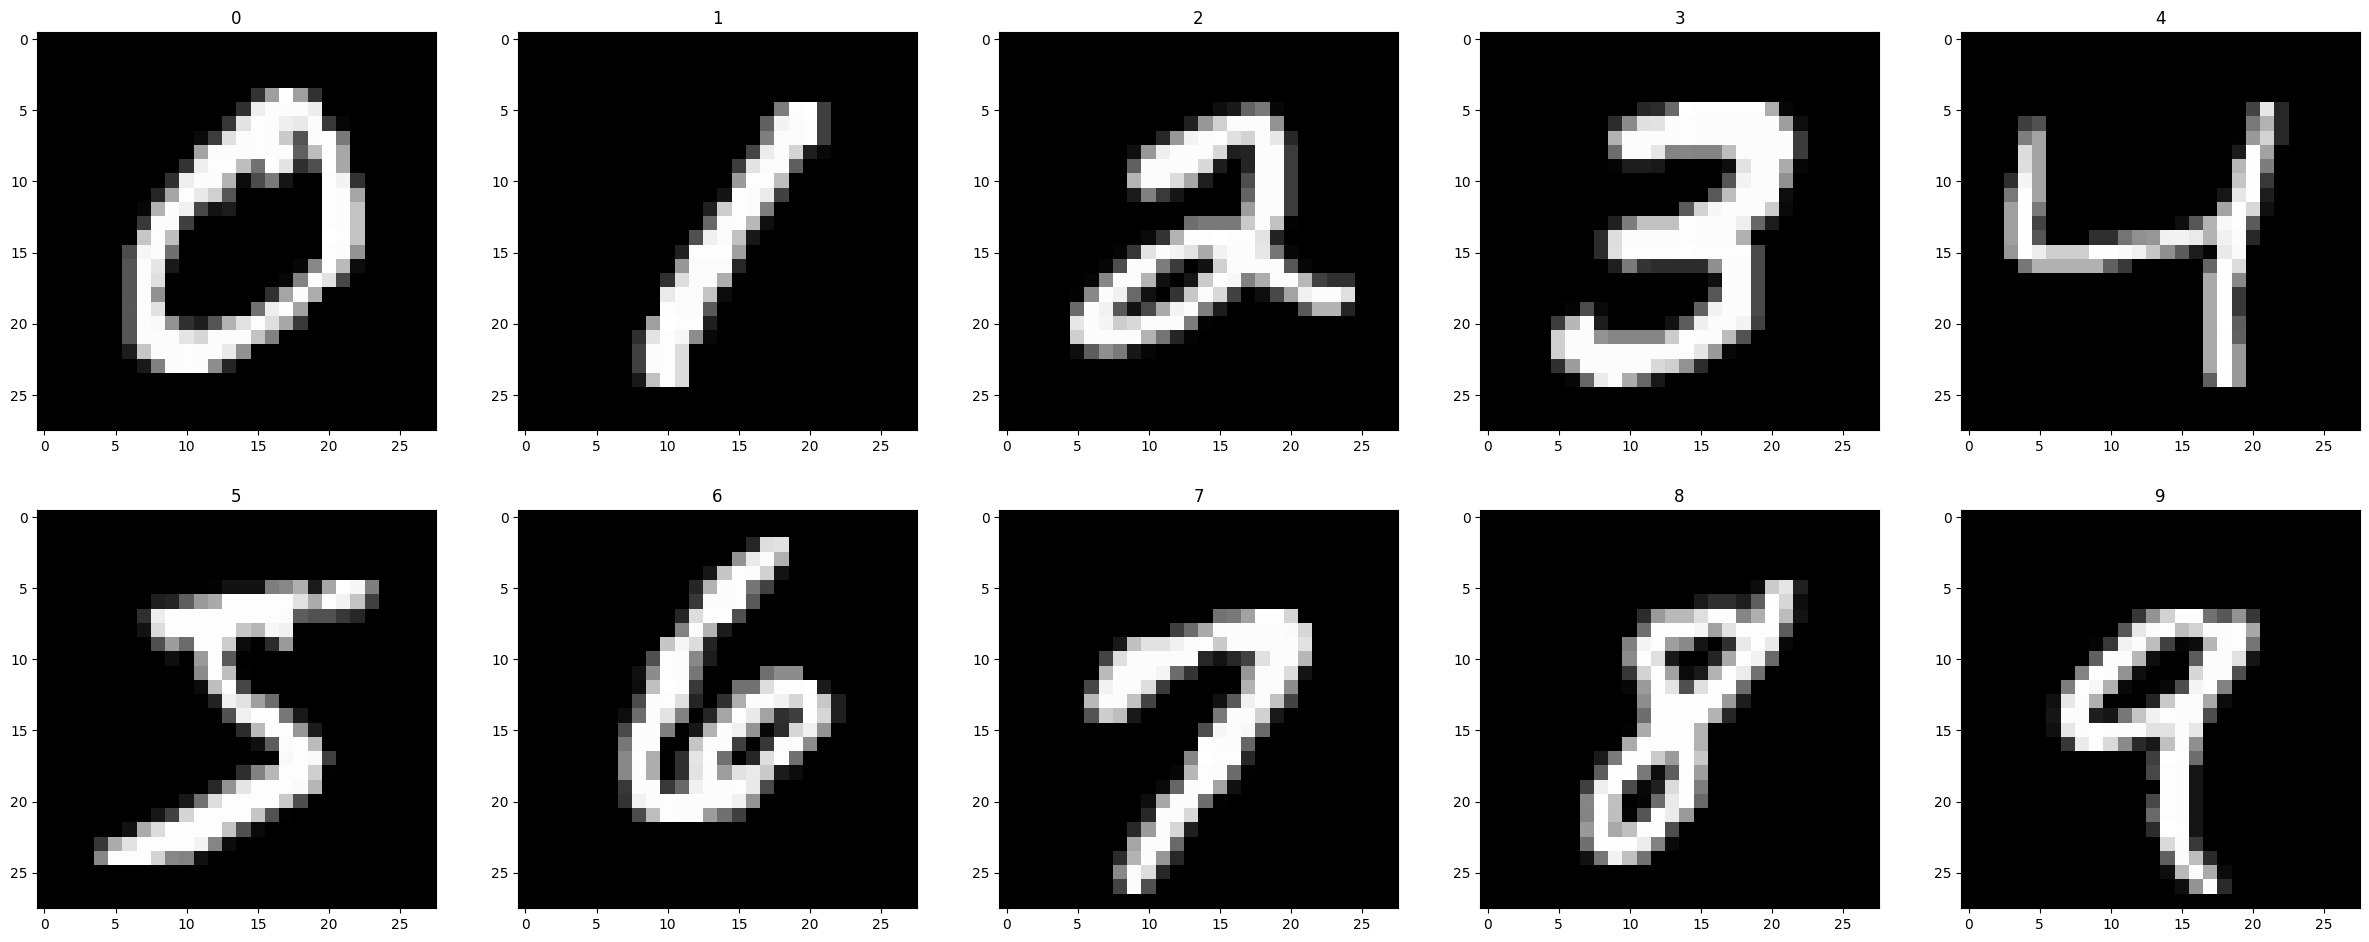

**One-hot encode the y labels.**

In [119]:
#ENTER YOUR CODE HERE
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

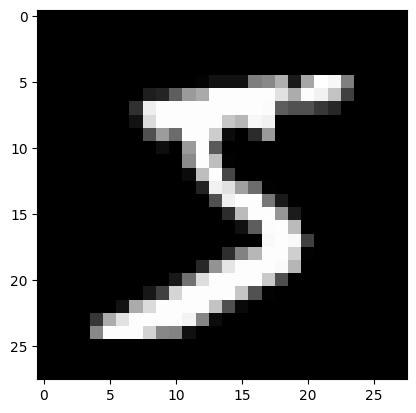

In [120]:
#ENTER YOUR CODE HERE
print(X_train[0])
image = X_train[0]
plt.imshow(image, cmap='gray')

The shape of each element is: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

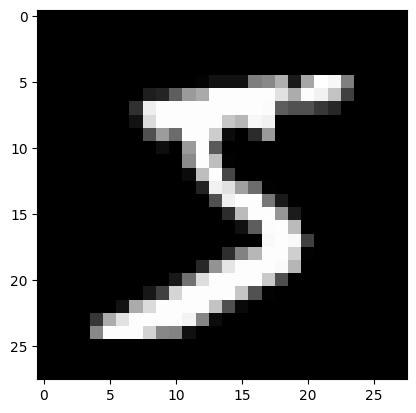

**Change the dimension of the training and testing datasets for it to become a 3D one. Remember this is a grayscale image.**

In [121]:
#ENTER YOUR CODE HERE
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)


**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [122]:
#ENTER YOUR CODE HERE
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.**

In [123]:
#ENTER YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [128]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Now split the dataset into a validation part.**

In [129]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


**Fit the model and plot the training history.**

Epoch 1/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.3469 - accuracy: 0.9333 - val_loss: 0.0739 - val_accuracy: 0.9778
Epoch 2/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.0691 - val_accuracy: 0.9793
Epoch 3/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0644 - val_accuracy: 0.9811
Epoch 4/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0984 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0649 - val_accuracy: 0.9829
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0640 - val_accuracy: 0.9848
Epoch 7/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0735 -

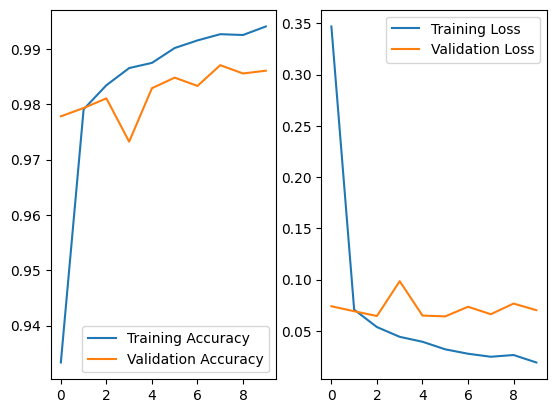

In [130]:
#ENTER YOUR CODE HERE
history = model.fit(X_training, y_training, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()



Epoch 1/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0494 - val_accuracy: 0.9862
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0377 -

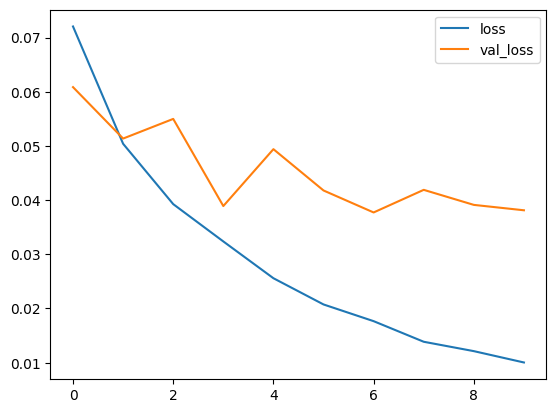

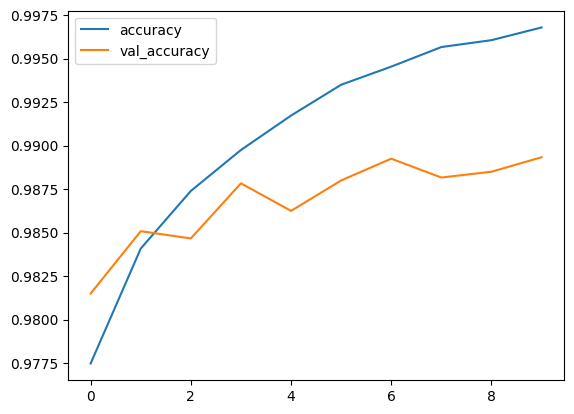

**Now test your model on the training dataset and print the classification matrix.**

In [134]:
#ENTER YOUR CODE HERE
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

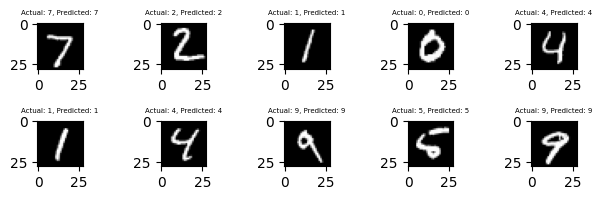

In [141]:
#ENTER YOUR CODE HERE

for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}", fontsize=5)

plt.tight_layout()
plt.show()

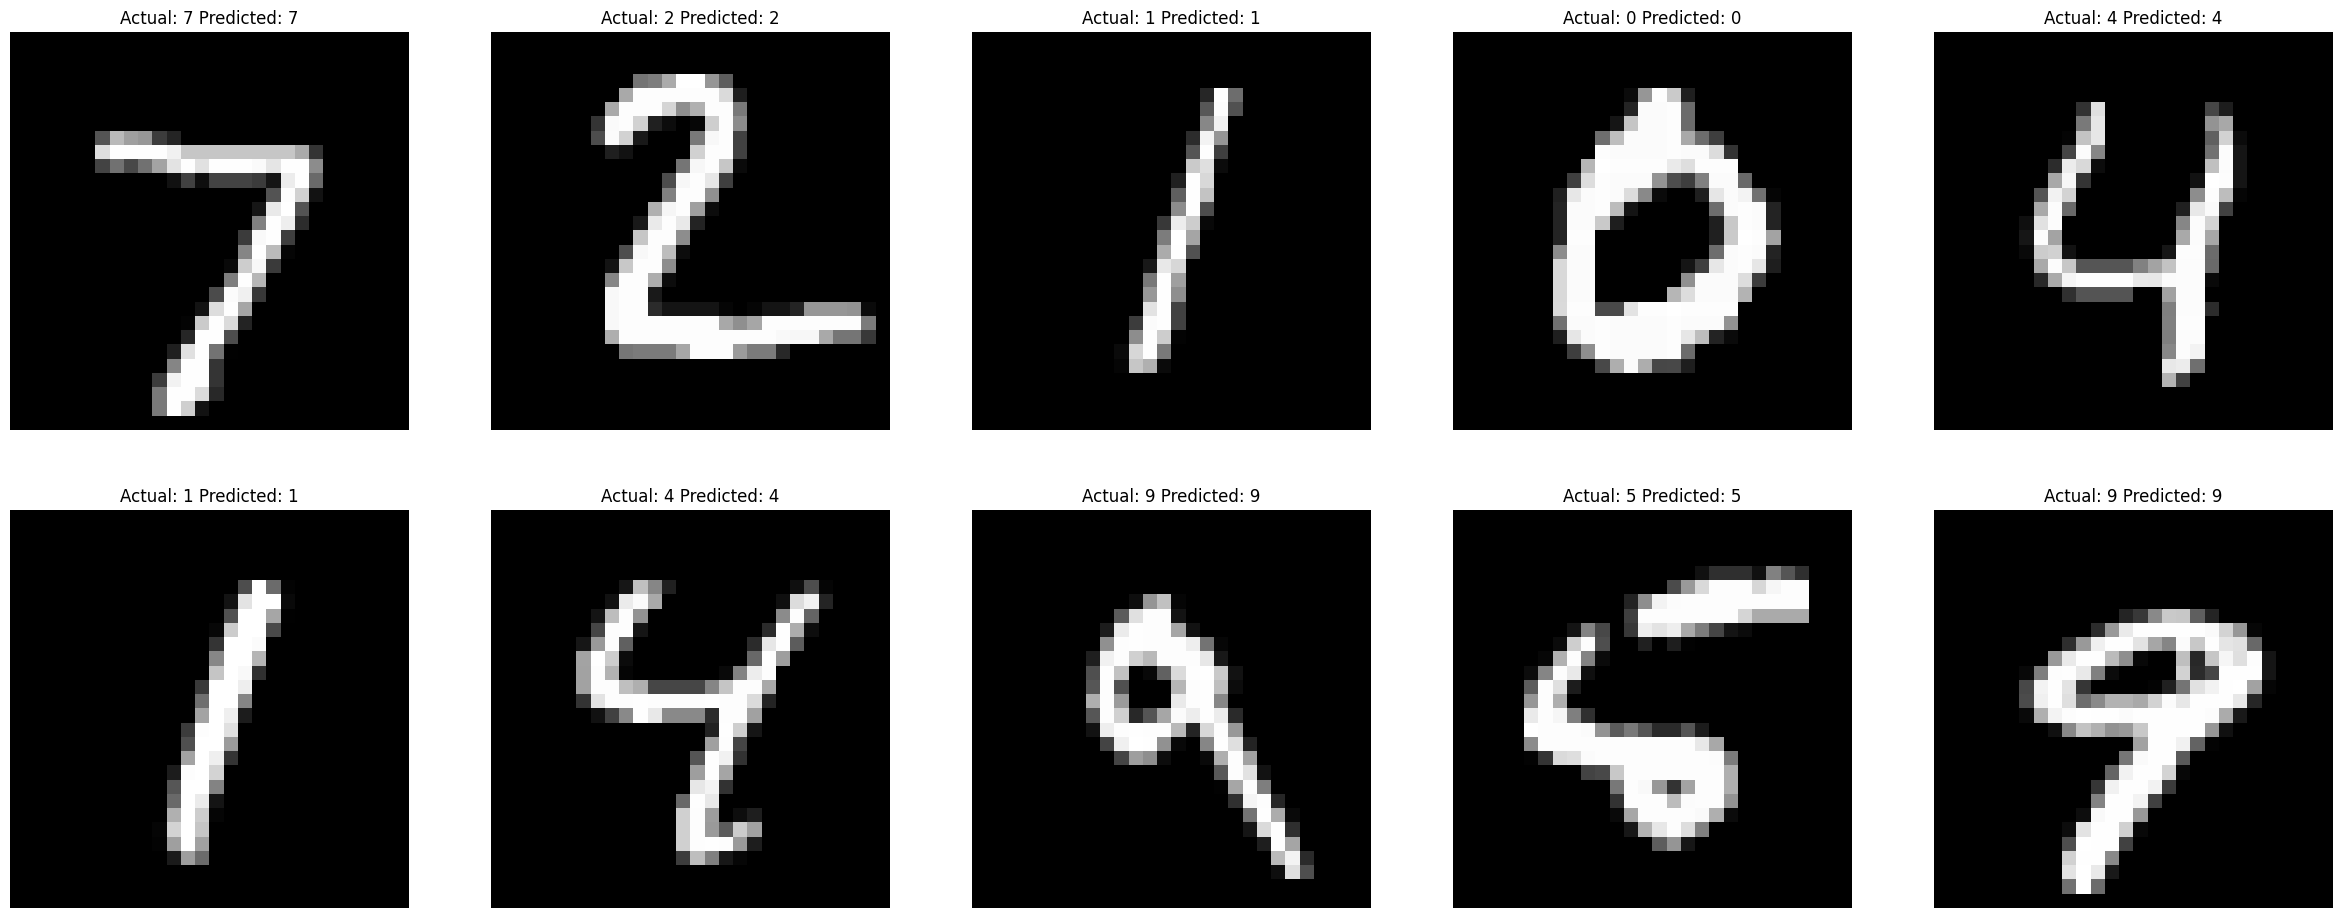

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

1/1 [==============================] - 0s 57ms/step


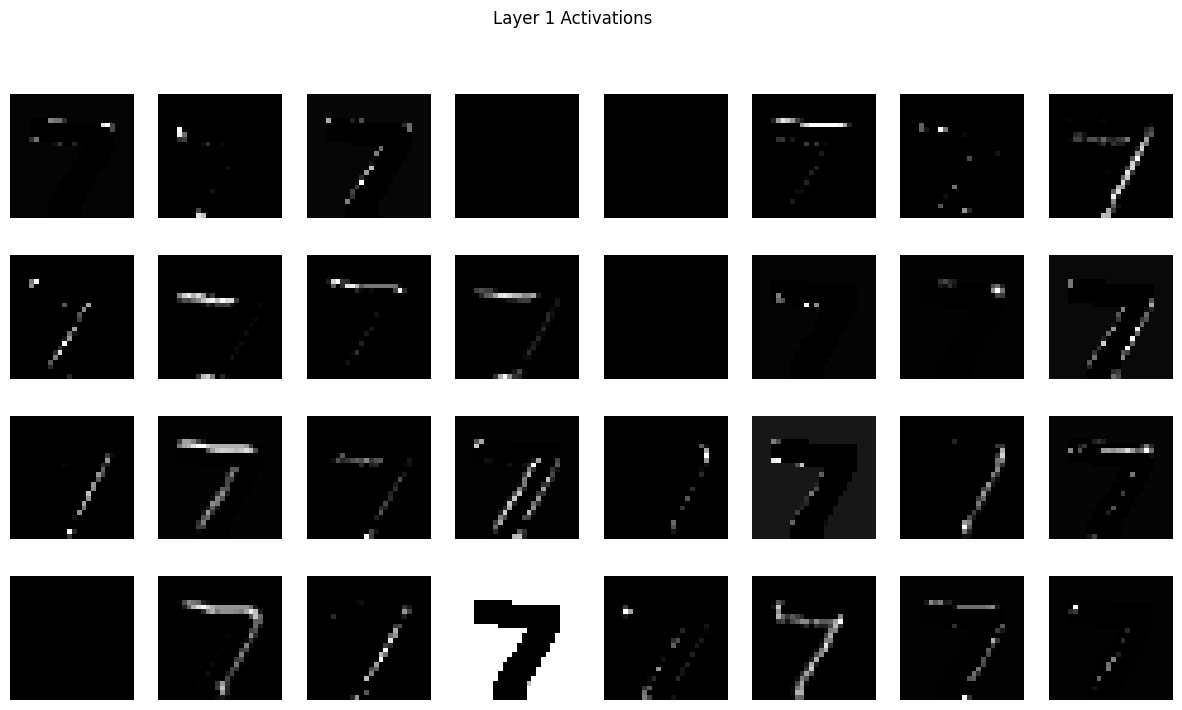

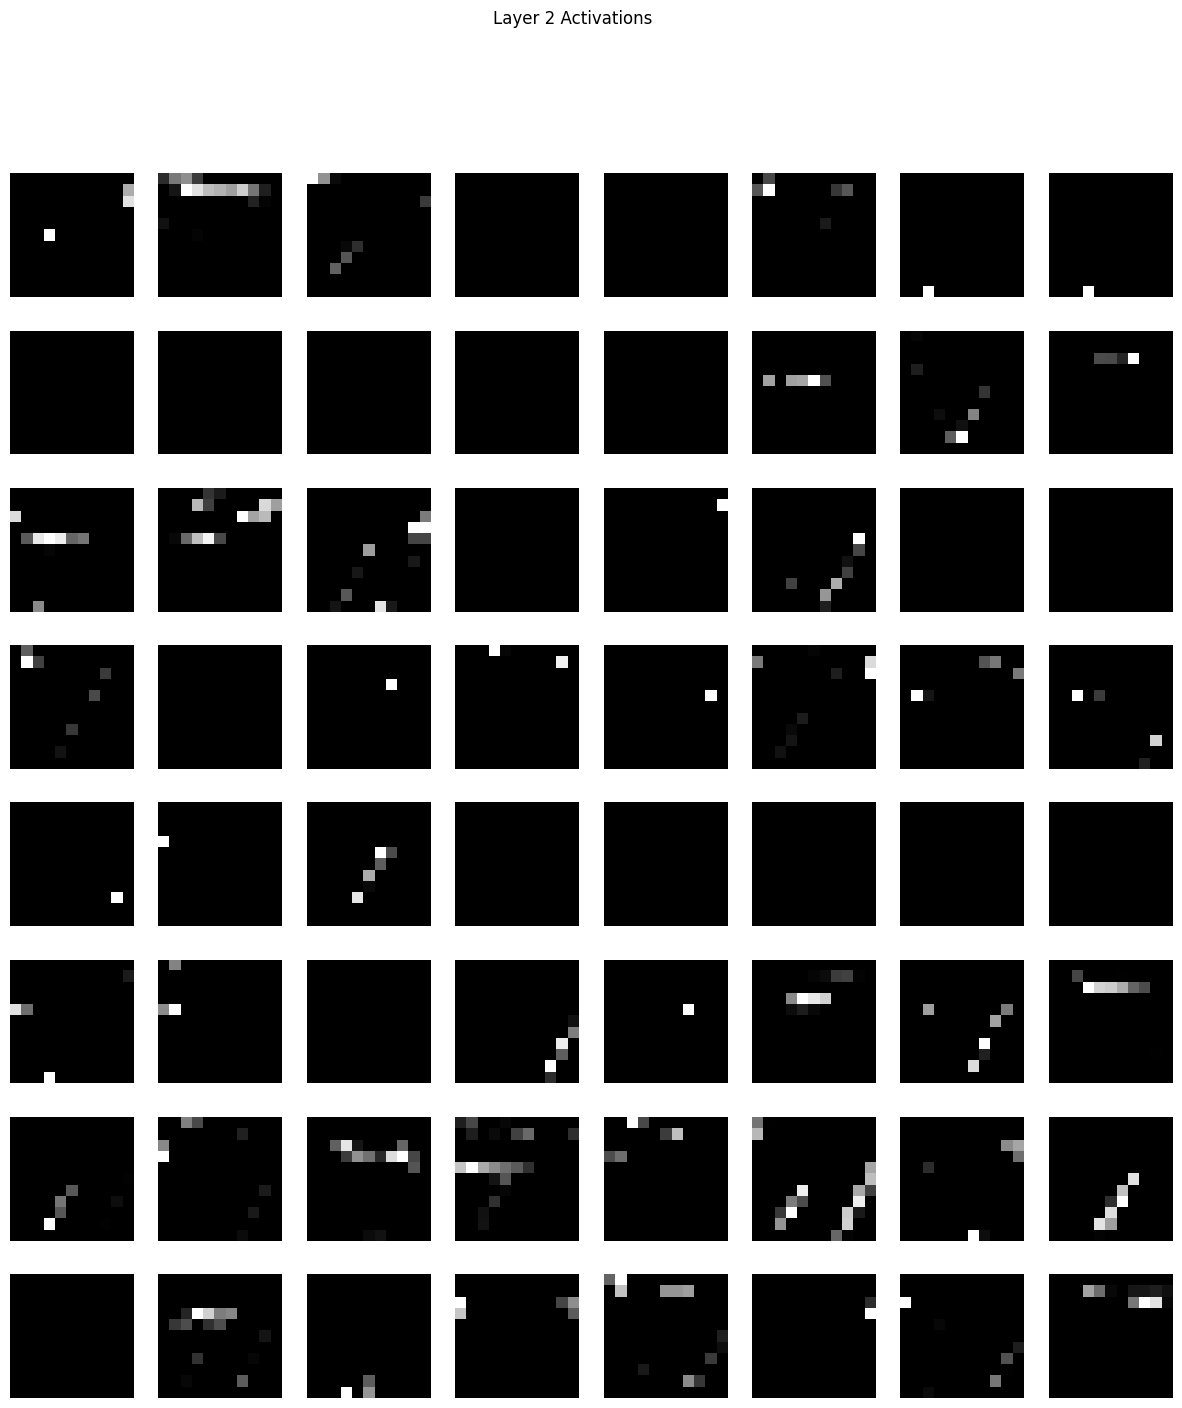

In [165]:
#ENTER YOUR CODE HERE
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

first_test_image = X_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(first_test_image)

for layer_index, activation in enumerate(activations):
    num_filters = activation.shape[-1]
    size = activation.shape[1]
    n_cols = num_filters // 8
    plt.figure(figsize=(15, n_cols * 2))
    for i in range(num_filters):
        plt.subplot(n_cols, 8, i + 1)
        plt.imshow(activation[0, :, :, i], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Layer {layer_index + 1} Activations')
    plt.show()


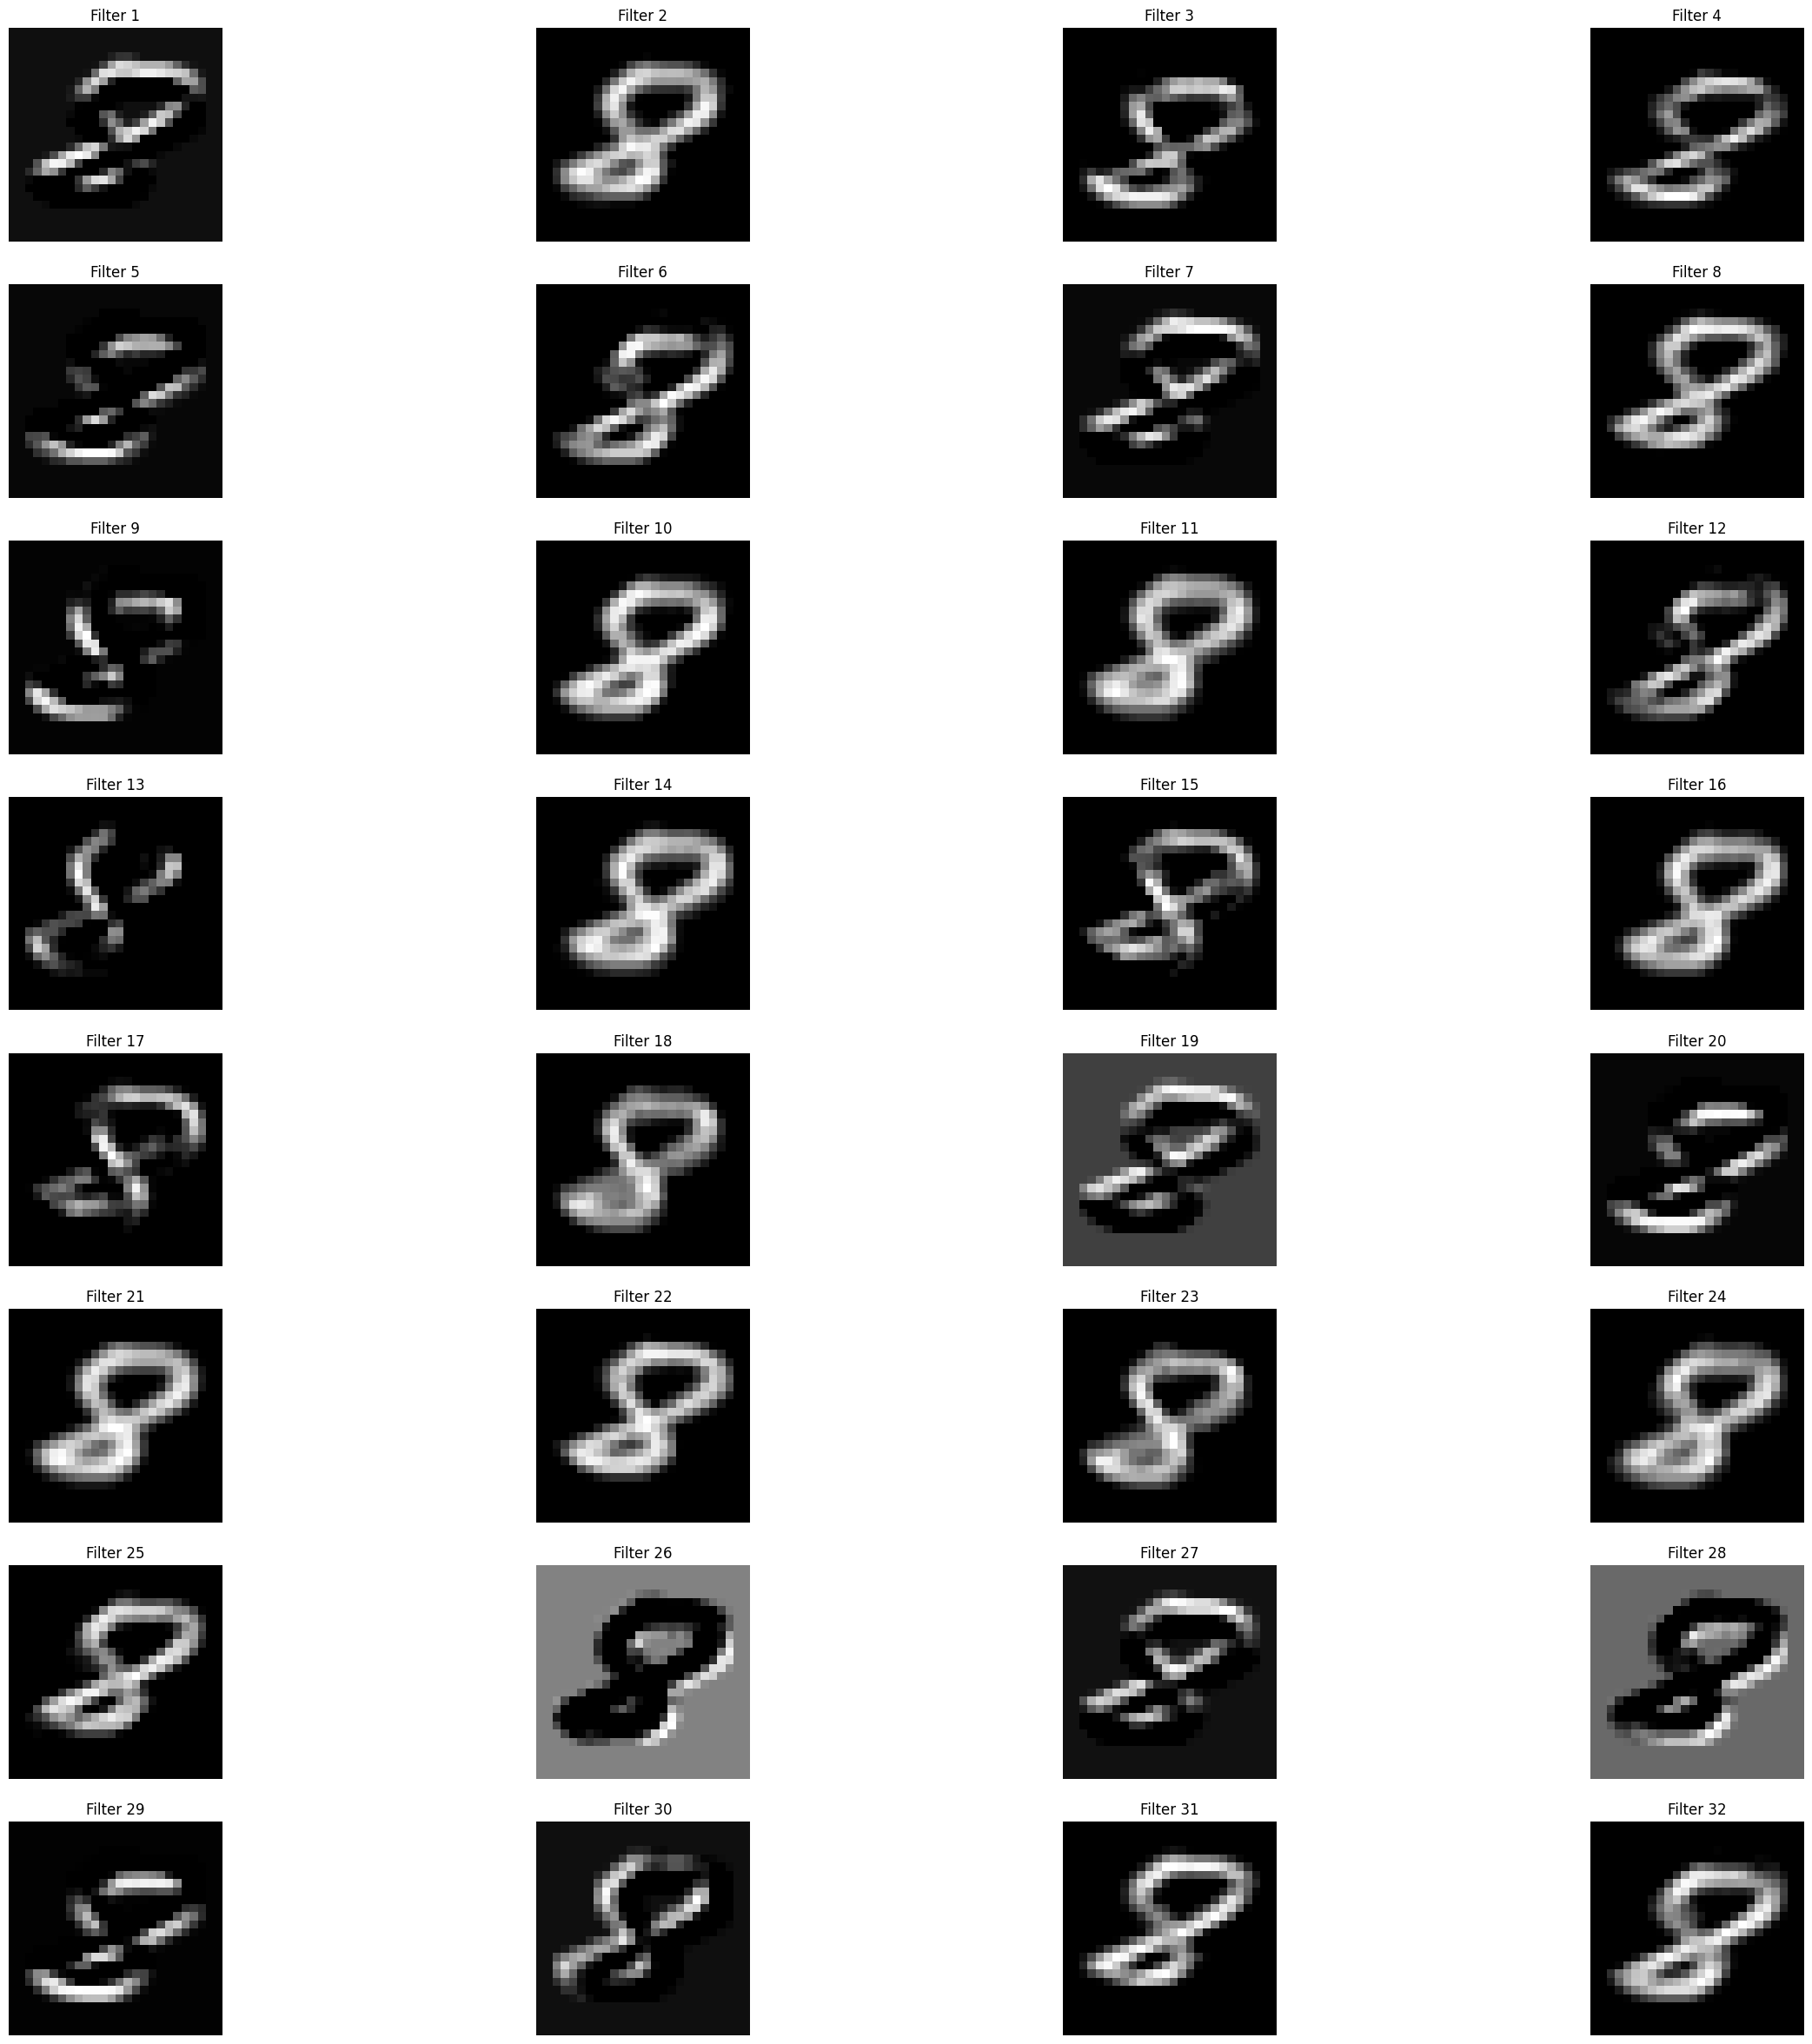

**Do the same for the output of the max pooling layer.**

1/1 [==============================] - 0s 136ms/step


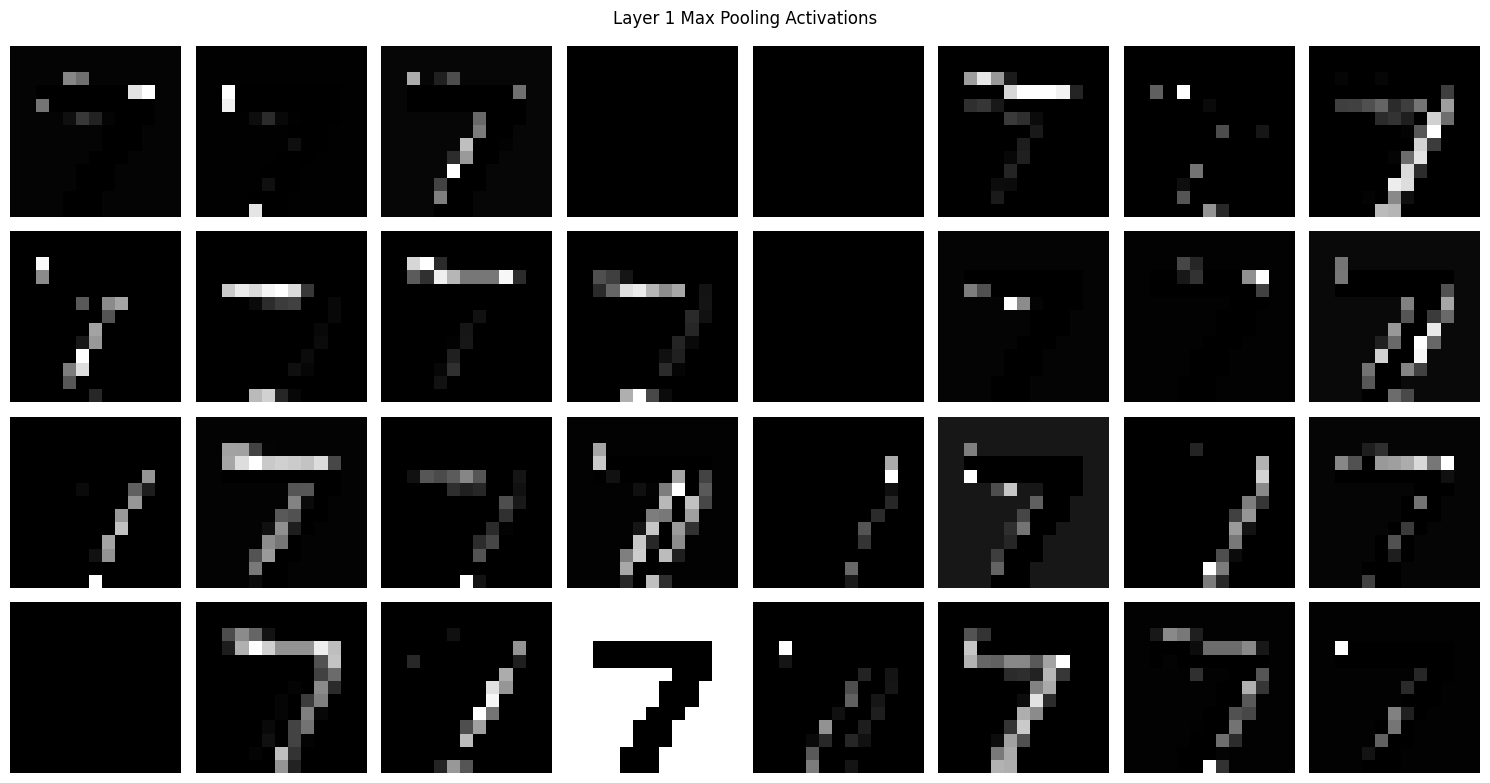

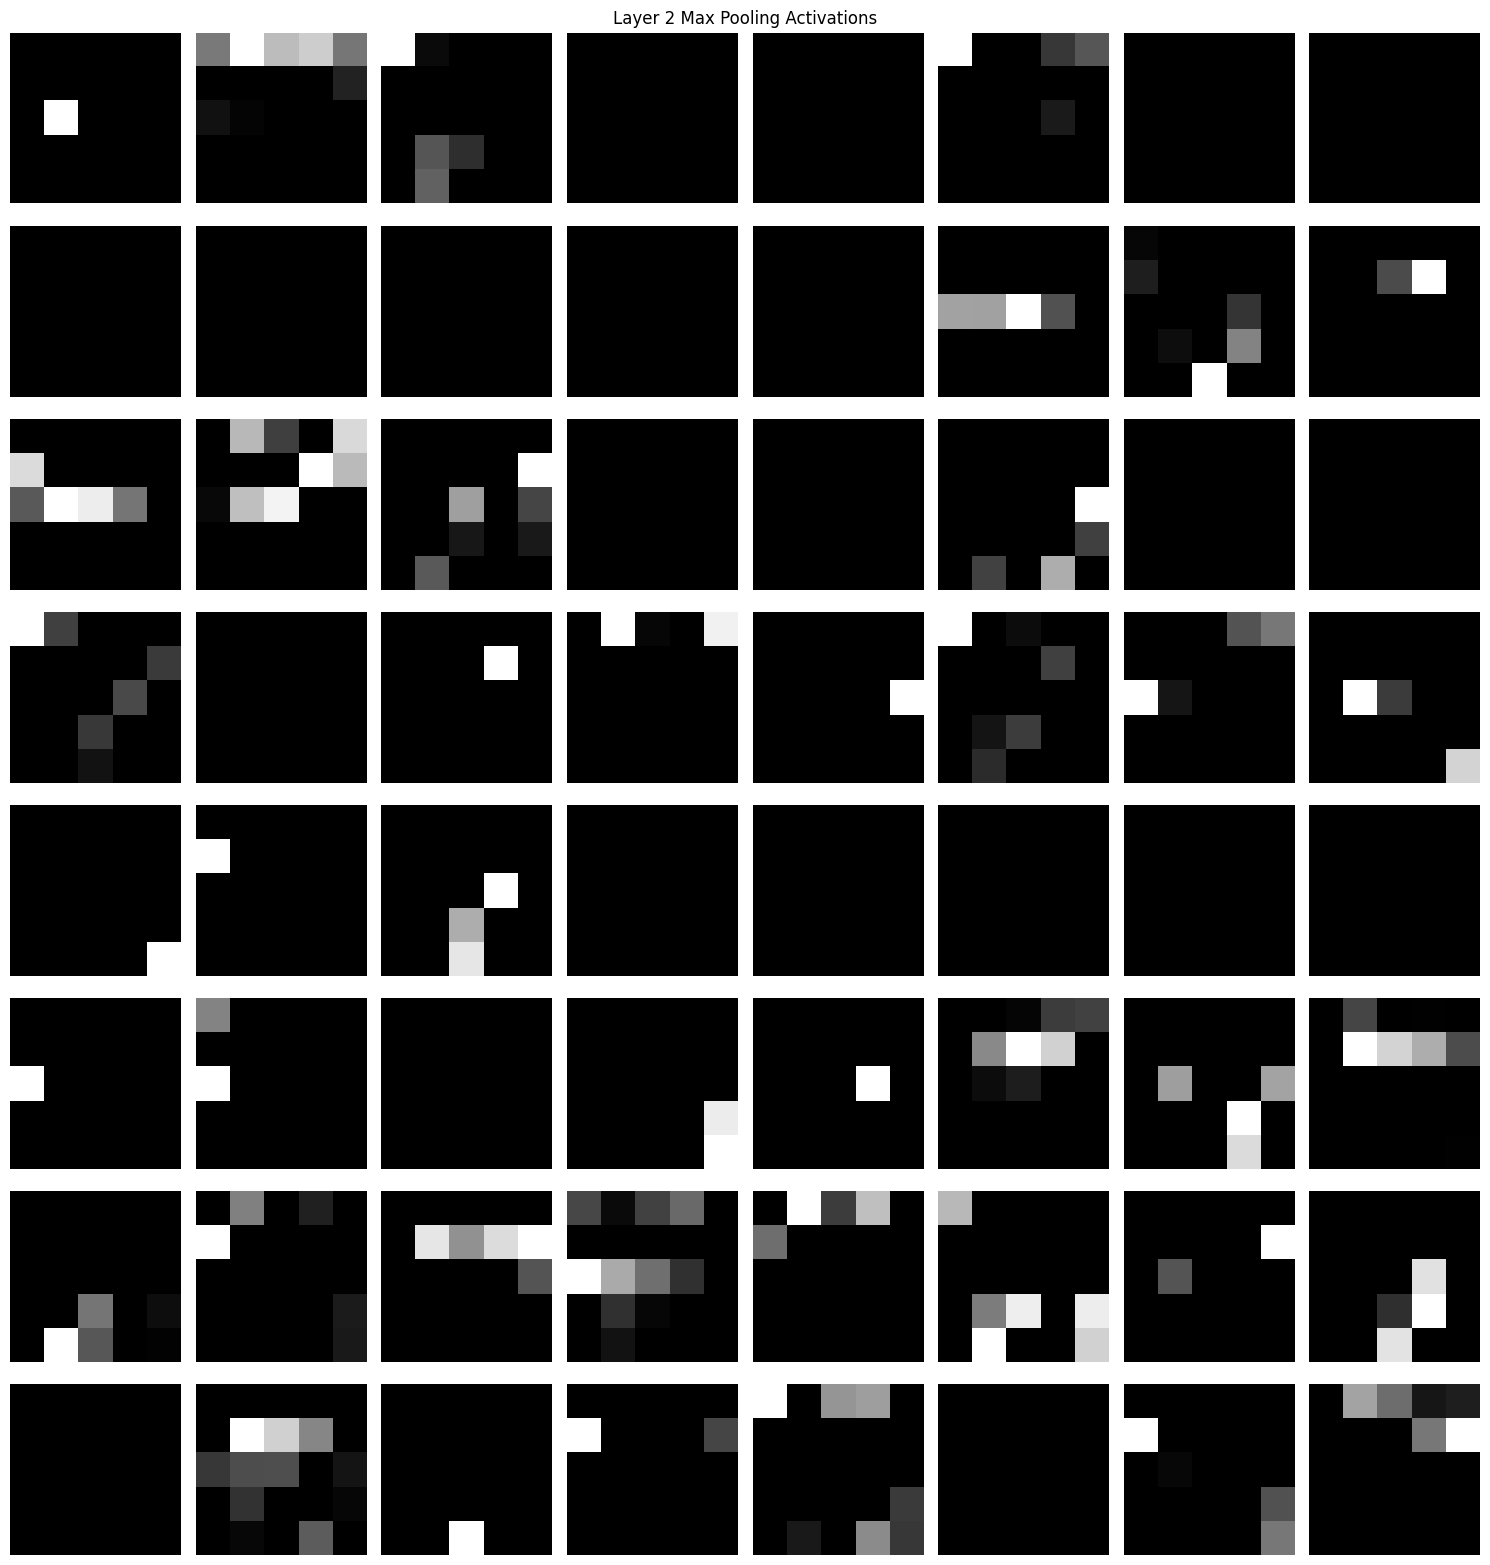

In [163]:
#ENTER YOUR CODE HERE
layer_outputs = [layer.output for layer in model.layers if 'max_pooling' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

first_test_image = X_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(first_test_image)

for layer_index, activation in enumerate(activations):
    num_filters = activation.shape[-1]
    size = activation.shape[1]
    n_cols = num_filters // 8 if num_filters % 8 == 0 else num_filters // 8 + 1
    plt.figure(figsize=(15, n_cols * 2))
    for i in range(num_filters):
        plt.subplot(n_cols, 8, i + 1)
        plt.imshow(activation[0, :, :, i], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Layer {layer_index + 1} Max Pooling Activations')
    plt.tight_layout()
    plt.show()

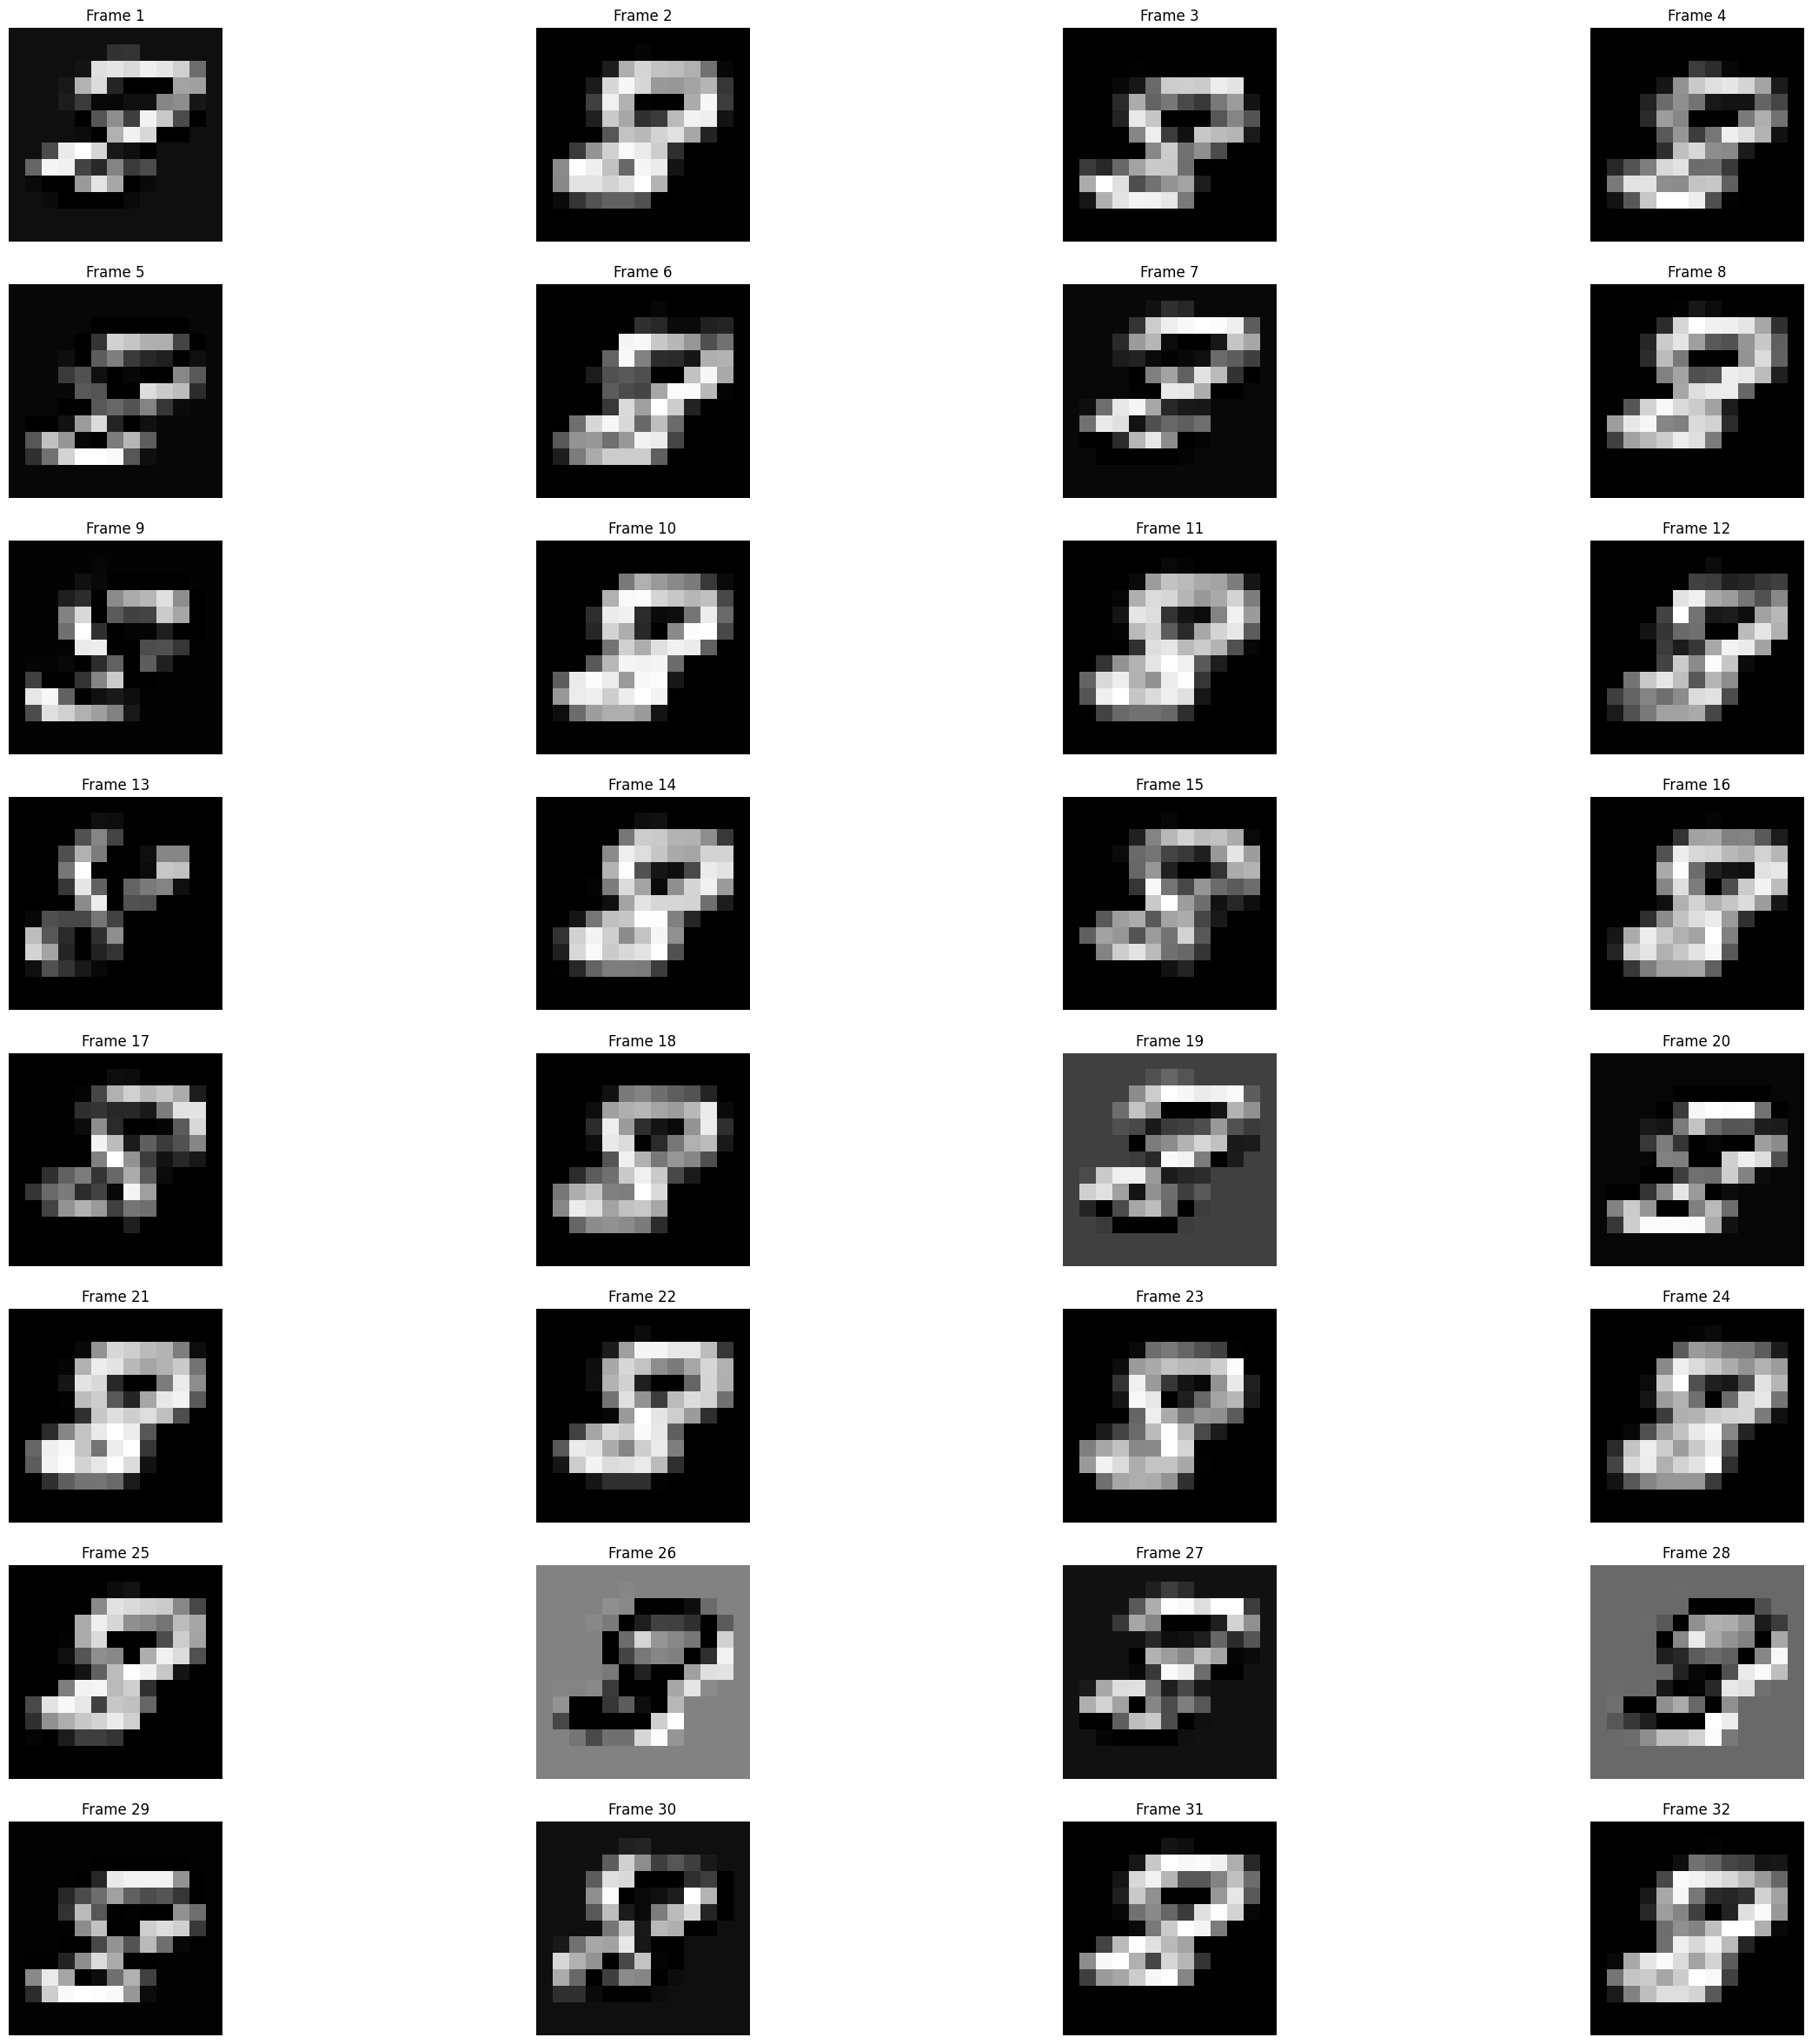

**Output of the third convolution layer.**

1/1 [==============================] - 0s 158ms/step


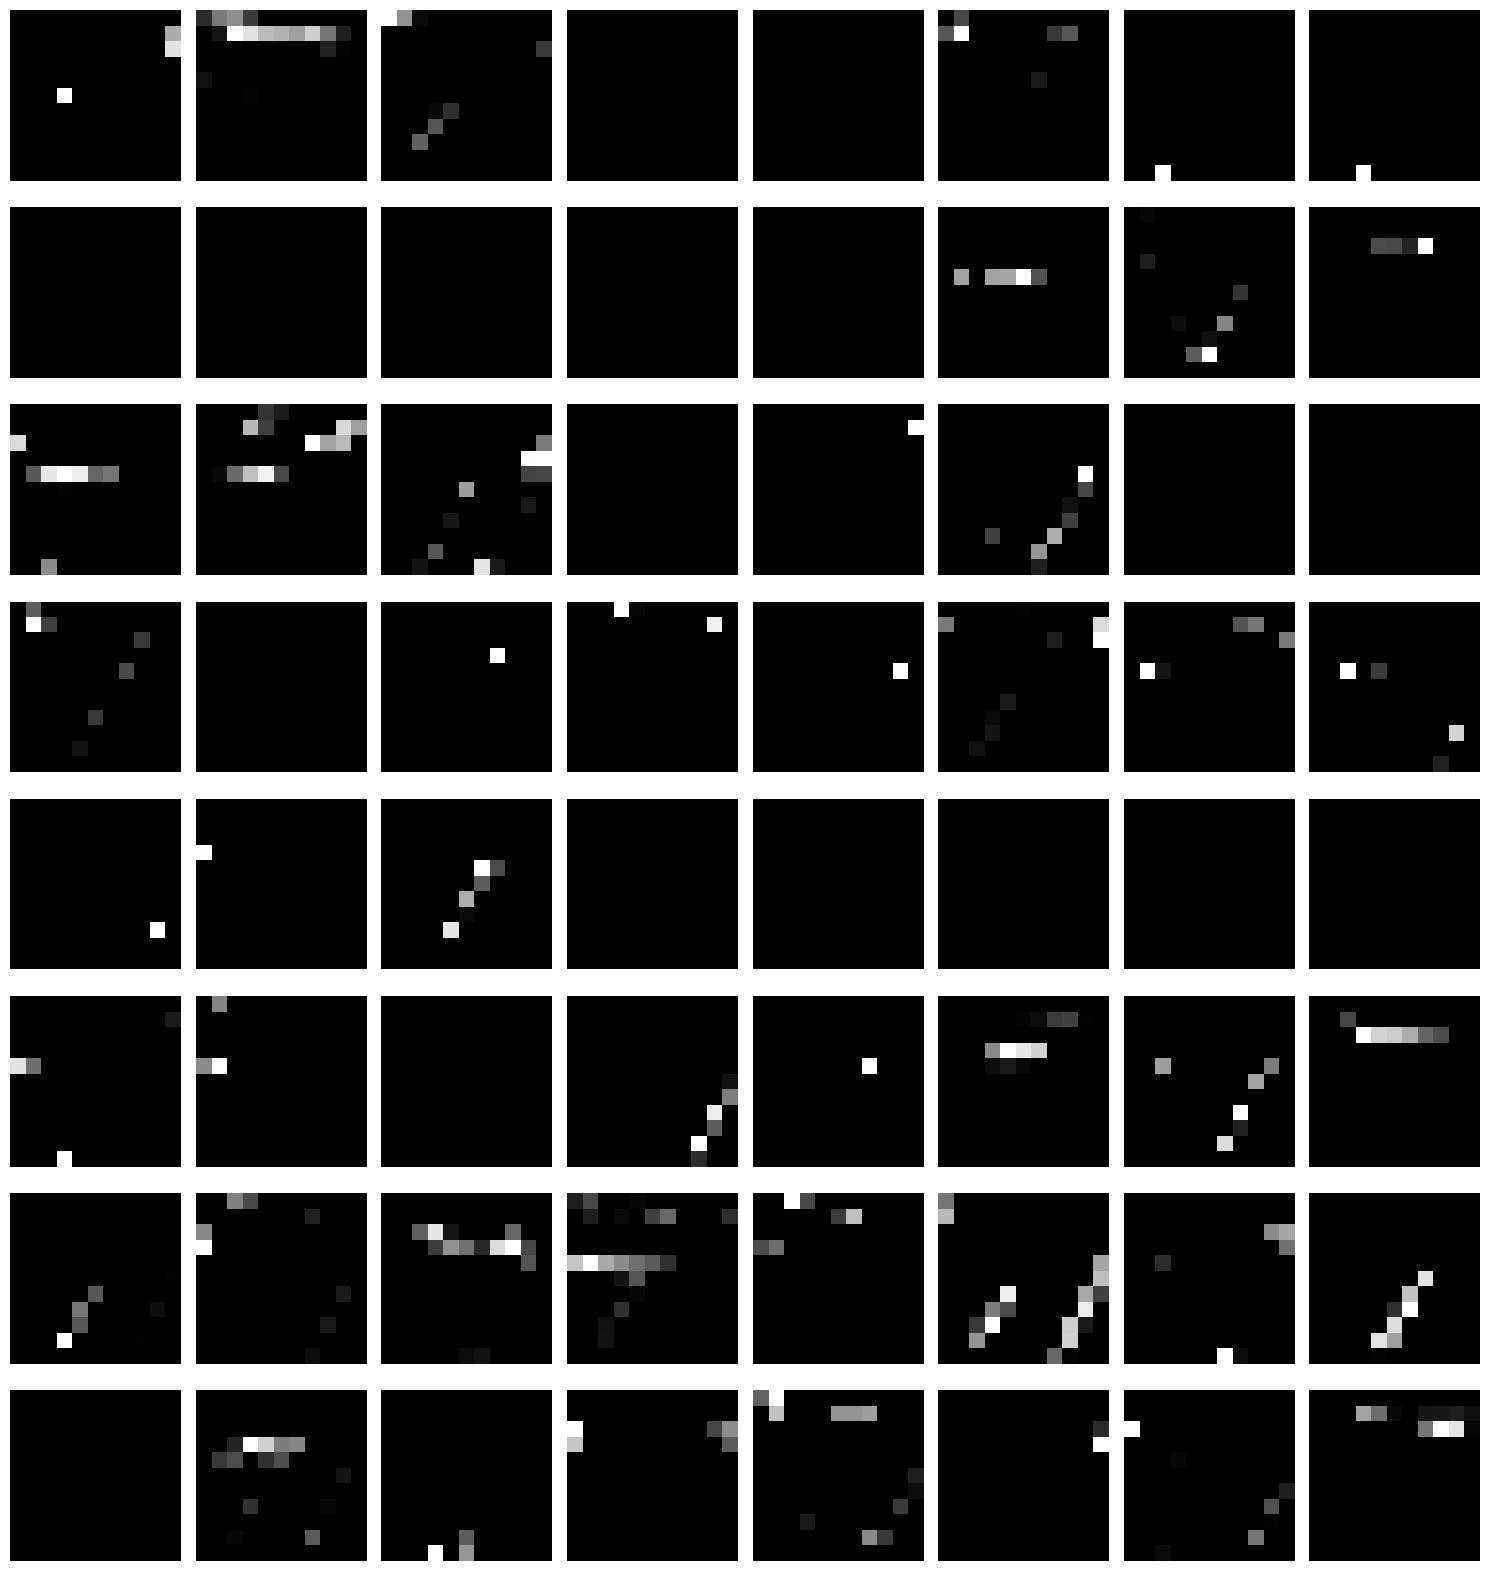

In [168]:
#ENTER YOUR CODE HERE
third_conv_layer_output = model.layers[5].output
activation_model = Model(inputs=model.input, outputs=third_conv_layer_output)

first_test_image = X_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(first_test_image)

num_filters = activations.shape[-1]
size = activations.shape[1]
n_cols = num_filters // 8 if num_filters % 8 == 0 else num_filters // 8 + 1
plt.figure(figsize=(15, n_cols * 2))
for i in range(num_filters):
    plt.subplot(n_cols, 8, i + 1)
    plt.imshow(activation[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

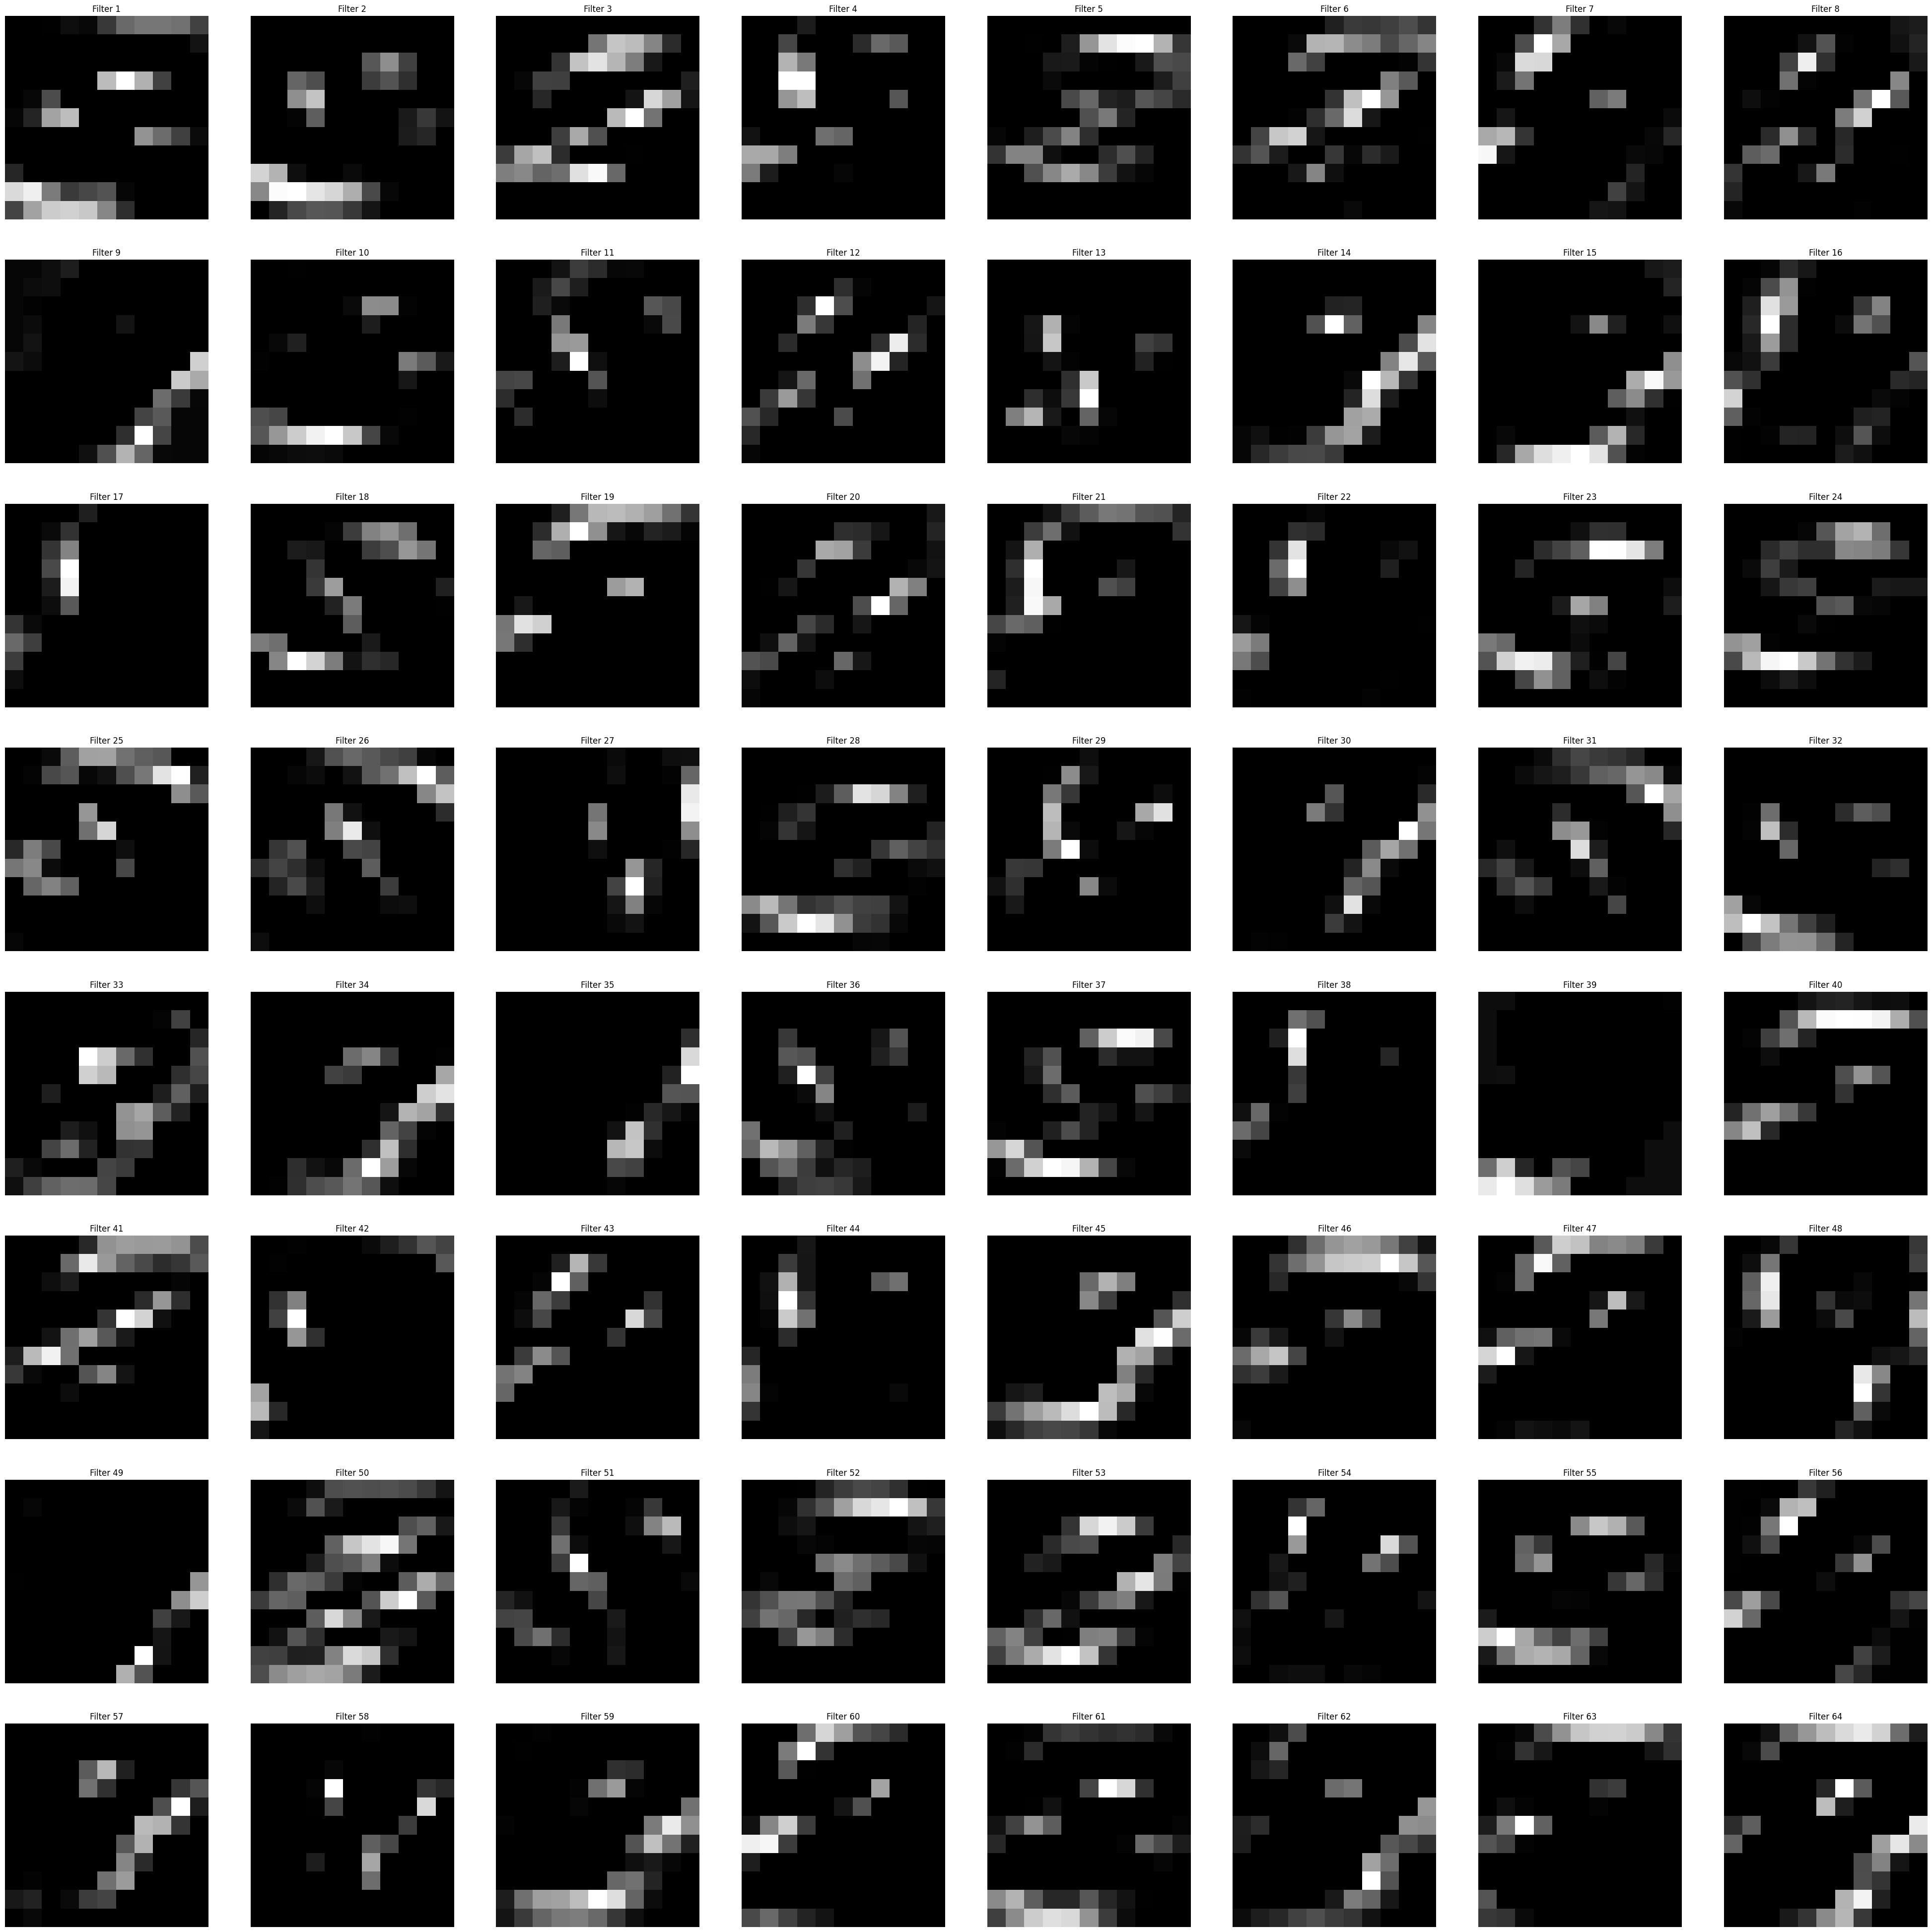

**It is now clearly visible that the each filter is extracting a particular feature.**